In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [10]:
# Skip the second row (index 1) containing HXL hashtags
df = pd.read_csv('poverty_ken.csv', skiprows=[1])

# Verify the correct fields are loaded
print("Detected Columns:", df.columns.tolist())
df.head()

Detected Columns: ['Country Name', 'Country ISO3', 'Year', 'Indicator Name', 'Indicator Code', 'Value']


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Kenya,KEN,2022,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,40.49575
1,Kenya,KEN,2020,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,50.81331
2,Kenya,KEN,2018,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,50.81331
3,Kenya,KEN,2016,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,50.81331
4,Kenya,KEN,2014,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,52.35971


In [11]:
# Ensure numeric types for analysis
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Remove any rows where values are missing after conversion
df_clean = df.dropna(subset=['Value'])

# Standardization: Filter for the primary vulnerability indicator
# Based on your snippet: "Population living in slums (% of urban population)"
target_indicator = "Population living in slums (% of urban population)"
vulnerability_df = df_clean[df_clean['Indicator Name'] == target_indicator]

In [12]:
# Flagging years/records where the value exceeds the 45% threshold
high_risk_trends = vulnerability_df[vulnerability_df['Value'] > 45]

print(f"Total High-Risk Data Points Found for {target_indicator}: {len(high_risk_trends)}")
high_risk_trends[['Year', 'Value']].tail()

Total High-Risk Data Points Found for Population living in slums (% of urban population): 11


,Year,Value
7,2008,56.99891
8,2006,58.54531
9,2004,60.09171
10,2002,61.63811
11,2000,63.18451


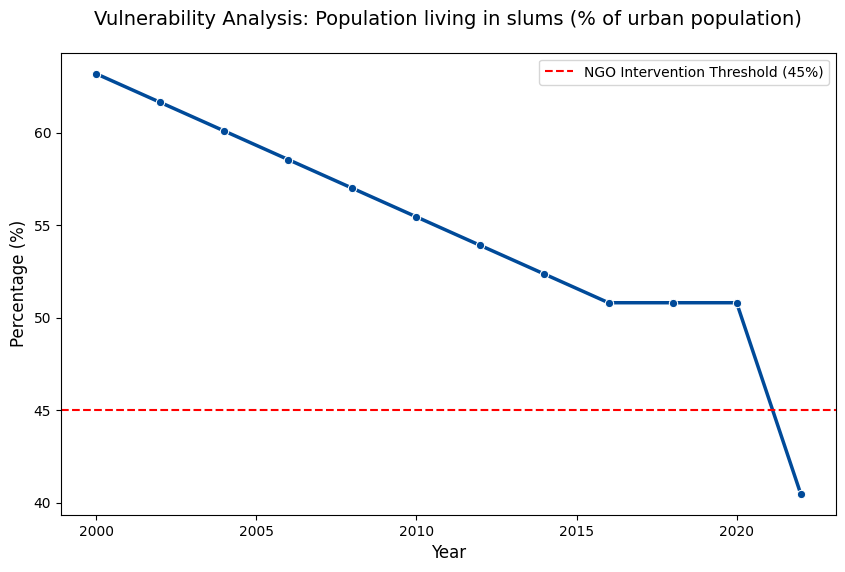

In [13]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(data=vulnerability_df, x='Year', y='Value', marker='o', color='#004a99', linewidth=2.5)

# Add the NGO threshold line at 45%
plt.axhline(45, ls='--', color='red', label='NGO Intervention Threshold (45%)')

plt.title(f'Vulnerability Analysis: {target_indicator}', fontsize=14, pad=20)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()

# Save the high-resolution visual for your GitHub Portfolio assets
plt.savefig('vulnerability_trend_kenya.png', bbox_inches='tight')
plt.show()